# Minimum Cost Flow Problem Solved
\begin{align*}
\min \quad & \sum_{(i,j) \in E} c_{ij} x_{ij} &\\
\text{S.t.:} \quad & \sum_{(i,j) \in E}  x_{ij} - \sum_{(j,i) \in E} x_{ji} = b_i & \forall i \in V  \\
& x_{ij} <=  u_{ij} & \forall (i,j) \in E \\
& x_{ij} \in \mathbf{R}^+ & \forall(i,j) \in E \\
\end{align*}

### Parameters
- $G = (V,E)$ is the graph; $V$ is the set of nodes (|$V$| = n) and $E$ is set of arcs(edges) 
- $c_{ij}$ is cost of flow on arc $(i,j)$
- $u_{ij}$ is capacity of flow on arc $(i,j)$
- $b_{i} =
\begin{cases}
     \text{Supply of node} \ i \text{, if } b_{i} \text{ is positive number} \\
     \text{Demand of node} \ i \text{, if } b_{i} \text{ is negative number}            
\end{cases} $

### Decision Variables
- $x_{ij} =  \text{amount of flow on arc} (i,j)$ 

 

In [1]:
import gurobipy as gp
from gurobipy import GRB
import time as time
import numpy as np
import matplotlib.pyplot as plt
import random

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.¶

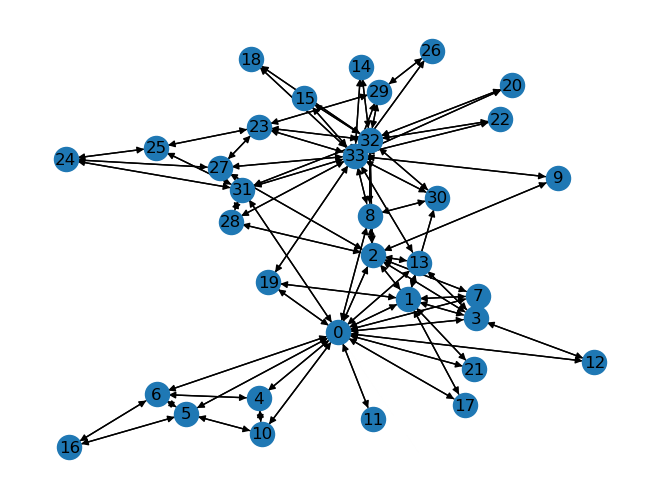

In [2]:
import networkx as nx
G = nx.DiGraph(nx.karate_club_graph())
nx.draw(G, with_labels = True)

In [3]:
V = nx.karate_club_graph()
Elst = list(V.edges()) #list of edges
Nodes = list(G.nodes())
len(Elst), len(Nodes)

(78, 34)

#### Create random cost and capacities for arc 

In [4]:
capacity = {(i,j): random.randint(100, 1000) for i,j in Elst}

In [5]:
cost = {(i,j): random.randint(1, 100) for i,j in Elst}

#### Nodes with odd indices are supply nodes, and the ones with even indices are demand nodes.

In [6]:
for node in G.nodes():
#     print(node)
    if node % 2 == 1:
        #odd indices
        G.nodes[node]['supply_demand'] = random.randint(1, 100)
    else:
        #even indices
        G.nodes[node]['supply_demand'] = random.randint(-100, -1)

#### check is supply matches demand

In [14]:
supply_sum = 0
demand_sum = 0
for node in G.nodes():

    if node % 2 == 1:
        #odd indices ->supply
        supply_sum = supply_sum + G.nodes[node]['supply_demand']
        nodeSupply=node
    else:
        #even indices ->demand
        demand_sum = demand_sum + G.nodes[node]['supply_demand']
        nodeDemand=node
        
    print(supply_sum, demand_sum, G.nodes[node]['supply_demand'])
            
        
diff = supply_sum - demand_sum
print('diff',diff,'supply_sum',supply_sum,'demand_sum',demand_sum)
if(diff< 0):
    G.nodes[nodeSupply]['supply_demand'] = G.nodes[nodeSupply]['supply_demand']+abs(diff)
elif(diff>0):
     G.nodes[nodeDemand]['supply_demand'] = G.nodes[nodeDemand]['supply_demand']+abs(diff)

0 -1 -1
58 -1 58
58 -16 -15
105 -16 47
105 -97 -81
140 -97 35
140 -161 -64
233 -161 93
233 -210 -49
258 -210 25
258 -306 -96
298 -306 40
298 -398 -92
392 -398 94
392 -456 -58
471 -456 79
471 -532 -76
521 -532 50
521 -556 -24
608 -556 87
608 -629 -73
681 -629 73
681 -702 -73
745 -702 64
745 -752 -50
837 -752 92
837 -837 -85
882 -837 45
882 -905 -68
895 -905 13
895 -921 -16
969 -921 74
969 -958 -37
1002 -958 33
diff 1960 supply_sum 1002 demand_sum -958


#### Assign random supply and demand values (bi values between 1 and 100, +ve for supply and -ve for demand)

In [15]:
#check Begin
supply_sum = 0
demand_sum = 0
for node in G.nodes():
    if node % 2 == 1:
        #odd indices ->supply
        supply_sum = supply_sum + G.nodes[node]['supply_demand']
    else:
        #even indices ->demand
        demand_sum = demand_sum + G.nodes[node]['supply_demand']

diff = supply_sum - demand_sum
print('diff',diff,'supply_sum',supply_sum,'demand_sum',demand_sum)
#check End
SupplyDemandBi = {node:G.nodes[node]['supply_demand'] for node in G.nodes()}
SupplyDemandBi

diff 0 supply_sum 1002 demand_sum 1002


{0: -1,
 1: 58,
 2: -15,
 3: 47,
 4: -81,
 5: 35,
 6: -64,
 7: 93,
 8: -49,
 9: 25,
 10: -96,
 11: 40,
 12: -92,
 13: 94,
 14: -58,
 15: 79,
 16: -76,
 17: 50,
 18: -24,
 19: 87,
 20: -73,
 21: 73,
 22: -73,
 23: 64,
 24: -50,
 25: 92,
 26: -85,
 27: 45,
 28: -68,
 29: 13,
 30: -16,
 31: 74,
 32: 1923,
 33: 33}

In [59]:
model = gp.Model('MCFP') #named model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-13


In [60]:
x = model.addVars( G.edges, vtype = GRB.CONTINUOUS, name = 'x') #creating decision variable

Adding Constraints

In [61]:
flow_balance_c = model.addConstrs(gp.quicksum(x[j,i] for i in G.successors(j)) -
                                  gp.quicksum(x[i,j] for i in G.predecessors(j)) == SupplyDemandBi[j] for i,j in Elst)

In [62]:
capacity_c = model.addConstrs((x[i,j] <= capacity[i,j] for i,j in Elst), name = 'capacity')

In [63]:
model.setObjective(gp.quicksum(cost[i,j] * x[i,j] for i,j in Elst),GRB.MINIMIZE)

In [66]:
model.update()
# model.display()

In [67]:
model.write('MCFP1.lp')

In [68]:
start = time.time()
model.optimize()
end = time.time()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 156 rows, 156 columns and 1334 nonzeros
Model fingerprint: 0x5444bcde
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 2e+03]
Presolve removed 132 rows and 40 columns
Presolve time: 0.01s
Presolved: 24 rows, 116 columns, 198 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.191250e+02   0.000000e+00      0s
       9    4.3360000e+03   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.01 seconds (0.00 work units)
Optimal objective  4.336000000e+03


In [69]:
def print_solution(model):
    if model.status != GRB.OPTIMAL:
        print("Model is not Optimized")
    
    else:
        print('Objective function value: ', model.objVal)
        print('Solution time: ', end - start, ' seconds')
        print('=================================================')
        vars = model.getVars()
        values = model.getAttr('x', vars)
        Selected_ArcDict = {}
        for var, val in zip(vars, values):
            if val > 1e-6:
                print(f"{var.varName}: {val}") 
       

In [70]:
print_solution(model)

Objective function value:  4336.0
Solution time:  0.022407054901123047  seconds
x[0,10]: 65.0
x[0,12]: 36.0
x[1,0]: 1803.0
x[2,1]: 1433.0
x[3,1]: 44.0
x[4,6]: 10.0
x[5,0]: 35.0
x[5,16]: 40.0
x[7,1]: 23.0
x[8,0]: 55.0
x[9,2]: 16.0
x[10,4]: 56.0
x[11,0]: 5.0
x[13,1]: 49.0
x[17,1]: 28.0
x[19,1]: 96.0
x[21,1]: 88.0
x[25,23]: 102.0
x[27,23]: 11.0
x[29,23]: 78.0
x[31,25]: 14.0
x[31,28]: 46.0
x[32,2]: 1456.0
x[32,30]: 80.0
x[33,8]: 88.0


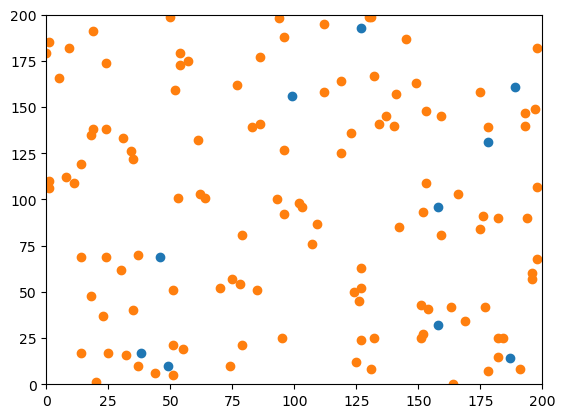

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1320 rows, 1210 columns and 3600 nonzeros
Model fingerprint: 0x31c7dc20
Variable types: 0 continuous, 1210 integer (1210 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+00, 5e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 22052.000000
Presolve time: 0.01s
Presolved: 1320 rows, 1210 columns, 3600 nonzeros
Variable types: 0 continuous, 1210 integer (1210 binary)
Found heuristic solution: objective 12509.000000

Root relaxation: objective 7.535000e+03, 228 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    7535.0000000 7535.00000  0.00%

In [21]:
#Question 2
#Question 2
#Import Libraries: The script imports necessary Python libraries for optimization, numerical operations, and plotting.
import gurobipy as gp
from gurobipy import *
import numpy as np
import time
import math
import matplotlib.pyplot as plt

#Parameter Initialization:
#m and n are set to 120 and 10, representing the number of demand points (customers) and potential facility sites, respectively.
#Demand and Facility are lists representing indices of customers and facilities

customers = 120
facilities = 10
#Generate Random Locations:

#Locations for facilities (x_F, y_F) and demand points (x_D, y_D) are randomly generated on a 200x200 grid.

Demand = [i for i in range(1, customers+1)]
Facility = [j for j in range(1, facilities+1)]

#Plot Initial Locations:

#The locations of facilities and demand points are plotted on a 2D scatter plot.

x_F = [np.random.randint(0, 200) for j in Facility]
y_F = [np.random.randint(0, 200) for j in Facility]

#Fixed Costs:

#Random fixed costs for opening each facility are generated within a specified range.

x_D = [np.random.randint(0, 200) for j in Demand]
y_D = [np.random.randint(0, 200) for j in Demand]

plt.xlim(0, 200)
plt.ylim(0, 200)
plt.scatter(x_F, y_F)
plt.scatter(x_D, y_D)
plt.show()

fixed_cost = {j : np.random.randint(100, 500) for j in Facility}

#Distance Calculation:

#The Calc_dist function calculates the  distance between a facility and a demand point.
#c is a dictionary holding the transportation costs (distances) between each facility and demand point pair.

def Calc_dist(x_F, y_F, x_D, y_D):
    return abs(x_F - x_D) + abs(y_F - y_D)

distance = {(i,j) : Calc_dist(x_F[j-1], y_F[j-1], x_D[i-1], y_D[i-1]) 
     for j in Facility for i in Demand} 

#Model initialization

model = gp.Model('UCFL')

x = model.addVars(distance.keys(), vtype = GRB.BINARY, name = 'x')
y = model.addVars(Facility, vtype = GRB.BINARY, name = 'y')

#Decison Variables  & Constraints

model.addConstrs((quicksum(x[i,j] for j in Facility) == 1 for i in Demand), name = 'name')

model.addConstrs((x[i,j] <= y[j] for i in Demand for j in Facility), name = 'name')

#Objective function

model.setObjective(quicksum(fixed_cost[j] * y[j] for j in Facility) + 
                   quicksum(distance[i,j] * x[i,j] for i, j in distance.keys()), GRB.MINIMIZE)

model.update()
model.write('UCFL.lp')

#Model optimization

start = time.time()
model.optimize()
end = time.time()

#Print solution


def print_solution(model):
    if model.status != GRB.OPTIMAL:
        print('Model is not optimized!')
        
    else:
        print('Optimal Value: ' , model.ObjVal)
        print('Solution time: ' , end - start, 'seconds')
        print('==========================================')
        vars = model.getVars()
        values = model.getAttr('x', vars)
        for var, val in zip(vars, values):
            if val > 1e-6:
                print(f"{var.varName}: {val}")

print_solution(model)


No. of Demands that are served by Facility 1 :  8
No. of Demands that are served by Facility 4 :  15
No. of Demands that are served by Facility 6 :  26
No. of Demands that are served by Facility 7 :  23
No. of Demands that are served by Facility 8 :  14
No. of Demands that are served by Facility 9 :  25
No. of Demands that are served by Facility 10 :  9


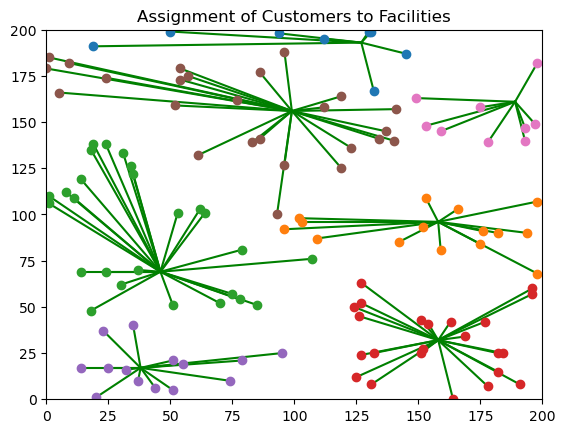

In [22]:
#Plot lines set the line for x axis and y axis
plt.xlim(0,200)
plt.ylim(0,200)
plt.title('Assignment of Customers to Facilities')

selected_facilities = [ j for j in Facility if y[j].x > 0.5 ]

for k in range(len(selected_facilities)):
    j = selected_facilities[k]
    served_by_k = [ i for i in Demand if x[i,j].x > 0.5 ]
    x_S = [ x_D[j-1] for j in served_by_k ]
    y_S = [ y_D[j-1] for j in served_by_k ]
    plt.scatter(x_S, y_S)
    print("No. of Demands that are served by Facility",j,": ",len(served_by_k))
    for i in served_by_k:    #Connect the facilities
        plt.plot([x_D[i-1],x_F[j-1]],[y_D[i-1],y_F[j-1]],c='g',zorder=0)
plt.show()
    